<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
The input layer, or visible layer, is the only neuron layer that interacts with and receives input from the dataset. There can be only one input layer in the network but it can have many nodes.
### Hidden Layer:
The hidden layers can only be accessed by first going through the input layer; that is, they never see the raw original data but only the data after the input layer has passed it along. There can be multiple hidden layers.
### Output Layer:
The output layer is the final layer in the network. Just like the input layer, there can be only one output layer. In a regression or binary classification model, there will be only one output node, while in a multiclass classification there would be multiple output nodes, one for each class.
### Neuron:
The neurons are the nodes that make up the neural network. They are called neurons because the idea of a neural network is to use math to represent the brain, and the brain is made up of cells called neurons. In the brain, a neuron sends a charge along to the next neuron if a certain threshold of energy is met; in a neural network, the nodes receive inputs and pass information to the next node if the input reaches a specified threshold.
Each neuron 
### Weight:
Weight represents the relationship between two nodes. It is the same as the gradient, or steepness, of a linear regression. 

### Activation Function:
The activation function modifies the output value so that it's in a format that fits the needs of our model. For example, a classification problem would need to produce a probability, which is rounded up to 1 or down to 0.
### Node Map:
A node map is a high level visual representation of the layers of a neural network.
### Perceptron:
A perceptron is the simplest type of neural network, which is just a single node. It takes in multiple inputs and gives an output. 

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### 
Information enters the neural network in the form of an input node and has a bias value added to it (similarly to the y-intercept value in a linear regression). This total is multiplied by a weight. If the neural network has additional hidden layers, they will take in this new value and return a calculated value. Once the data travels through all of the layers, it comes to the output. If an activation function is needed to adjust the results of the calculations, it is run here. 

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [8]:
import pandas as pd
import numpy as np
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [9]:
correct_outputs = np.array([[1],[1],[1],[0],[0]])
inputs = np.array([
    [0,0], [1,0], [0,1], [1,1], [1,1]
])

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1 - sx)

In [11]:
weights = 2 * np.random.random((2,1)) - 1
weights

array([[-0.76522901],
       [ 0.56450206]])

In [12]:
for iteration in range(10000):
    weighted_sum = np.dot(inputs, weights)
    activated_output = sigmoid(weighted_sum)
    error = correct_outputs - activated_output
    adjustments = error * sigmoid_derivative(weighted_sum)
    weights += np.dot(inputs.T, adjustments)

In [13]:
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[-0.36490336]
 [-0.36490336]]
Output after training
[[0.5       ]
 [0.40977312]
 [0.40977312]
 [0.32523714]
 [0.32523714]]


That's not what I wanted, but it runs, so that's progress.

## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [14]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [22]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]

X = diabetes[feats].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

y = diabetes['Outcome'].values

In [35]:
X_scaled.shape

(768, 8)

In [78]:
##### Update this Class #####

class Perceptron:
    
    def __init__(self, niter = 10):
        self.niter = niter
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def __sigmoid_derivative(self, x):
        sx = self.__sigmoid(x)
        return sx * (1 - sx)

    def fit(self, X, y):
        self.weights = 2 * np.random.random((X.shape[1],1)) - 1
        for i in range(self.niter):
            self.weighted_sum = np.dot(X, self.weights)
            self.activated_outputs = self.__sigmoid(self.weighted_sum)
            self.error = y - self.activated_outputs
            self.adjustments = self.error * self.__sigmoid_derivative(self.weighted_sum)
            self.weights = self.weights + np.dot(X.T, self.adjustments)
        return self
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """
        
    def net_input(self, X):
        return np.dot(X, self.weights)  

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [80]:
pn = Perceptron(100)
pn.fit(X_scaled, y)
preds = pn.predict(X_scaled)

In [81]:
preds

array([[1, 0, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 1, 0],
       ...,
       [1, 0, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 1, 0]])

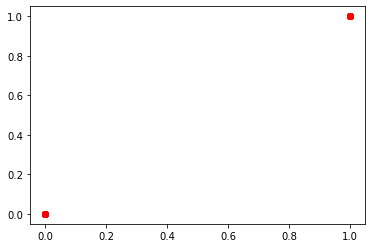

In [82]:
import matplotlib.pyplot as plt
plt.scatter(preds[:1], y, color='red')
plt.show()

Was trying to get a graph to show me how the predictions compared to the real results but it didn't work

In [75]:
from sklearn.metrics import accuracy_score

In [84]:
accuracy_score(preds[:1].T, y)

1.0

That's not good...b

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?